<a href="https://colab.research.google.com/github/myeongseop2/NIDS_project/blob/main/Probe/feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import csv
import collections
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns 

scaler = MinMaxScaler()
le = LabelEncoder()

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/project/NIDS/data/NSL_KDD/KDDTrain_probe.csv')
test_df = pd.read_csv('/content/drive/MyDrive/project/NIDS/data/NSL_KDD/KDDTest_probe.csv')
feature_names = collections.defaultdict(list)

with open('/content/drive/MyDrive/project/NIDS/data/NSL_KDD/Field_Names.txt', 'r') as f:
  for line in f.readlines()[1:]:
    name, nature = line.strip()[:-1].split(':')
    feature_names[nature.replace(" ", "")].append(name)

In [ ]:
df = pd.concat([train_df, test_df])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,http,SF,287,2251,0,0,0,0,...,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12126,0,tcp,pop_3,RSTO,0,36,0,0,0,0,...,0.19,0.03,0.00,0.00,0.01,0.02,0.73,0.98,mscan,15
12127,0,tcp,pop_3,RSTO,0,36,0,0,0,0,...,0.25,0.11,0.02,0.03,0.00,0.00,0.86,1.00,mscan,12
12128,5,tcp,imap4,RSTO,0,44,0,0,0,0,...,0.13,0.04,0.01,0.06,0.00,0.00,0.47,0.97,mscan,14
12129,2,tcp,telnet,SF,24,109,0,0,0,0,...,0.33,0.03,0.01,0.02,0.00,0.00,0.88,0.69,mscan,8


In [ ]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
attack_category = []
attack_type_int_test = []
attack_type = list(df['attack_type']  == 'normal')
for t in attack_type:
  if t:
    attack_category.append('normal')
    attack_type_int_test.append(0)
  else:
    attack_category.append('probe')
    attack_type_int_test.append(1)

df['attack_category'] = attack_category
df['attack_type'] = attack_type_int_test
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,level,attack_category
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,15,normal
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,21,normal
4,0,tcp,http,SF,287,2251,0,0,0,0,...,0.00,0.12,0.03,0.00,0.00,0.00,0.00,0,21,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12126,0,tcp,pop_3,RSTO,0,36,0,0,0,0,...,0.03,0.00,0.00,0.01,0.02,0.73,0.98,1,15,probe
12127,0,tcp,pop_3,RSTO,0,36,0,0,0,0,...,0.11,0.02,0.03,0.00,0.00,0.86,1.00,1,12,probe
12128,5,tcp,imap4,RSTO,0,44,0,0,0,0,...,0.04,0.01,0.06,0.00,0.00,0.47,0.97,1,14,probe
12129,2,tcp,telnet,SF,24,109,0,0,0,0,...,0.03,0.01,0.02,0.00,0.00,0.88,0.69,1,8,probe


In [ ]:
y = df['attack_category']
X = df.drop(columns=['attack_category', 'level'])
labels = y.unique()
feature_name = X.columns

In [ ]:
X['protocol_type'] = le.fit_transform(X['protocol_type'])
X['service'] = le.fit_transform(X['service'])
X['flag'] = le.fit_transform(X['flag'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [ ]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=feature_name)
X_test = pd.DataFrame(X_test)

In [ ]:
# f-value, selectKBest

f_value = f_classif(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [19 41] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
sel_top_cols = SelectKBest(f_classif, k=20)
sel_top_cols.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [19 41] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=20)

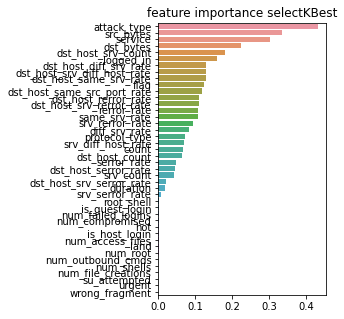

In [ ]:
sel_importance = pd.Series(sel_top_cols.scores_, index = X_train.columns)
sel_importance = sel_importance.sort_values(ascending=False)

plt.figure(figsize=(3,5))
plt.title("feature importance selectKBest")
sns.set_palette("bright")
sns.barplot(x=sel_importance, y=sel_importance.index)
plt.show()

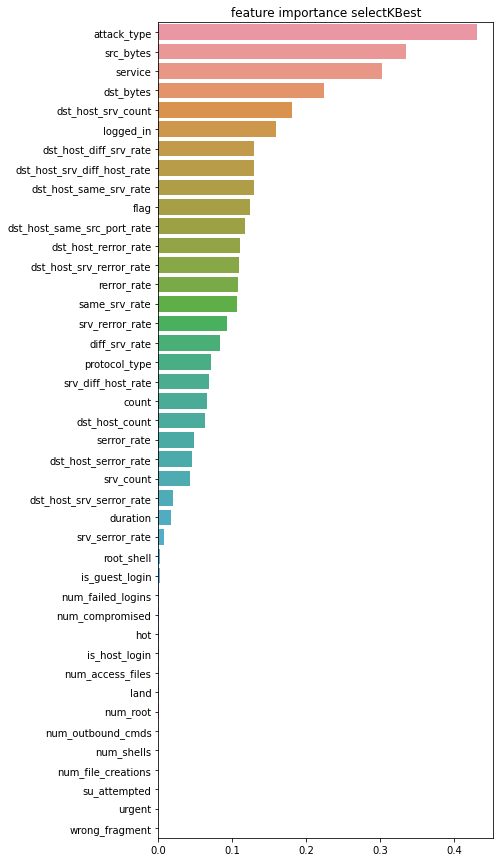

In [ ]:
plt.figure(figsize=(6,15))
plt.title("feature importance selectKBest")
sns.set_palette("bright")
sns.barplot(x=sel_importance, y=sel_importance.index)
plt.show()

In [ ]:
sel_top_cols = SelectKBest(mutual_info_classif, k=20)
sel_top_cols.fit(X_train, y_train)
X_train.columns[sel_top_cols.get_support()]
print(X_train.columns[sel_top_cols.get_support()])
print("scores:",sel_top_cols.scores_)

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'logged_in', 'count', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type'],
      dtype='object')
scores: [0.01677371 0.07100093 0.30190708 0.1231617  0.33403723 0.22407115
 0.0006286  0.         0.         0.00121621 0.00128567 0.15883445
 0.00125328 0.00216329 0.         0.00060514 0.         0.
 0.00099099 0.         0.00118635 0.00146688 0.06596876 0.04204448
 0.04776451 0.00815036 0.10777821 0.09267388 0.10561267 0.08332384
 0.06847479 0.06332266 0.18011879 0.12940467 0.12966807 0.11688502
 0.1294725  0.04508431 0.0197918  0.11001318 0.10833257 0.43086415]


In [ ]:
# 랜덤 포레스트
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# n_features = X_train.shape[1]
# plt.figure(figsize=(5,7))
# plt.barh(np.arange(n_features), sorted(forest.feature_importances_), align="center")
# plt.yticks(np.arange(n_features), X_train.columns)
# plt.xlabel("Random Forest Feature Importance")
# plt.ylabel("Feature")

In [ ]:
ft_importance_fore = pd.Series(forest.feature_importances_, index = X_train.columns)
ft_importance_fore = ft_importance_fore.sort_values(ascending=False)
ft_importance_fore

attack_type                    3.478531e-01
src_bytes                      1.464235e-01
dst_host_diff_srv_rate         5.990710e-02
dst_bytes                      5.775162e-02
dst_host_srv_count             5.382804e-02
dst_host_srv_diff_host_rate    4.171827e-02
dst_host_same_src_port_rate    4.131543e-02
dst_host_srv_rerror_rate       4.030212e-02
dst_host_same_srv_rate         2.522394e-02
dst_host_rerror_rate           2.409569e-02
service                        2.354401e-02
protocol_type                  2.185369e-02
rerror_rate                    2.129500e-02
flag                           1.945681e-02
dst_host_count                 1.660571e-02
logged_in                      1.212176e-02
same_srv_rate                  1.143321e-02
count                          6.328686e-03
srv_rerror_rate                6.170802e-03
diff_srv_rate                  6.009429e-03
srv_diff_host_rate             4.771989e-03
dst_host_serror_rate           3.351910e-03
srv_count                      2

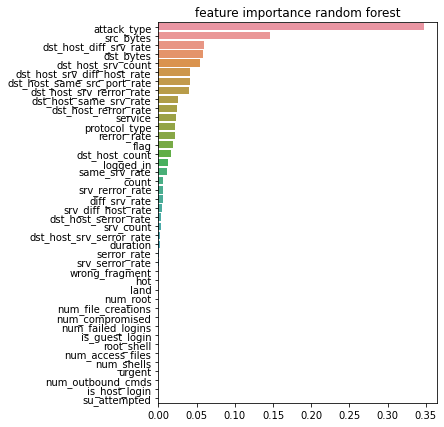

In [ ]:
plt.figure(figsize=(5,7))
plt.title("feature importance random forest")
sns.set_palette("bright")
sns.barplot(x=ft_importance_fore, y=ft_importance_fore.index)
plt.show()

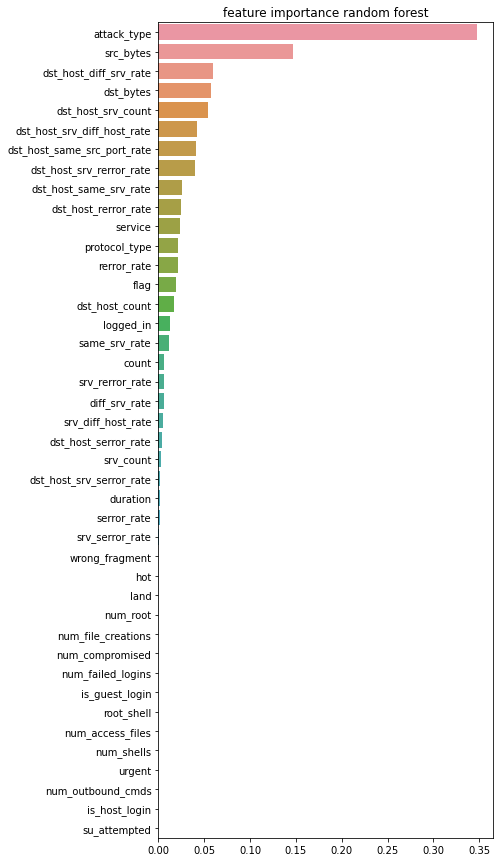

In [ ]:
plt.figure(figsize=(6,15))
plt.title("feature importance random forest")
sns.set_palette("bright")
sns.barplot(x=ft_importance_fore, y=ft_importance_fore.index)
plt.show()

In [ ]:
# 상관 관계
corr = X_train.corr()
corr_y = abs(corr['attack_type'])
highest_corr = corr_y[corr_y > 0.1]
highest_corr.sort_values(ascending=True)

srv_count                      0.111070
srv_serror_rate                0.137003
dst_host_serror_rate           0.149518
serror_rate                    0.149840
dst_host_srv_serror_rate       0.172094
duration                       0.184341
srv_diff_host_rate             0.214969
service                        0.232685
count                          0.248795
protocol_type                  0.254831
dst_host_srv_diff_host_rate    0.386236
diff_srv_rate                  0.435325
dst_host_same_srv_rate         0.439889
same_srv_rate                  0.467348
flag                           0.473075
dst_host_rerror_rate           0.485056
dst_host_same_src_port_rate    0.498905
srv_rerror_rate                0.506317
rerror_rate                    0.510143
dst_host_srv_rerror_rate       0.513276
logged_in                      0.518808
dst_host_srv_count             0.533153
dst_host_diff_srv_rate         0.558376
attack_type                    1.000000
Name: attack_type, dtype: float64

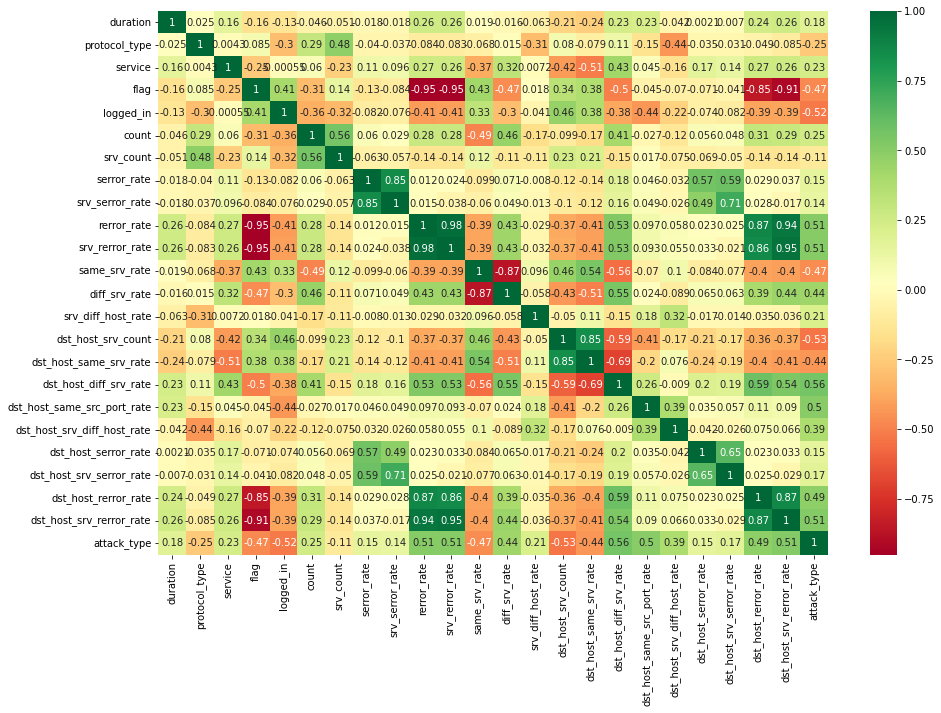

In [ ]:
highest_corr_columns = highest_corr.index
plt.figure(figsize=(15,10))
g=sns.heatmap(X_train[highest_corr.index].corr(),annot=True,cmap="RdYlGn")